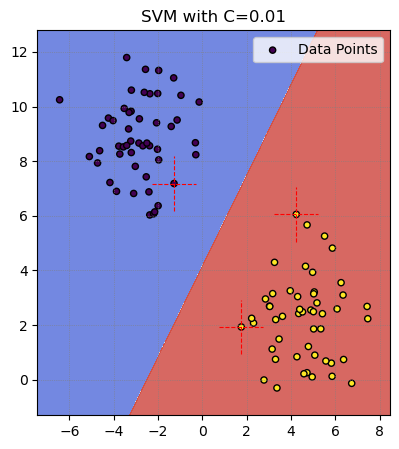

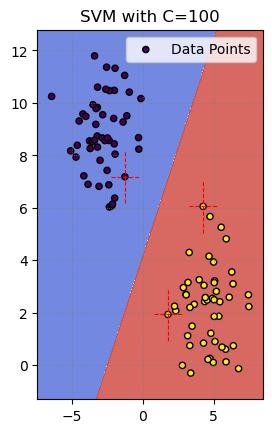

In [21]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM models with two different C values
svm_model_c1 = SVC(kernel='linear', C=0.1)  # Smaller C (allows more margin violations)
svm_model_c2 = SVC(kernel='linear', C=10)   # Larger C (tries to minimize margin violations)

svm_model_c1.fit(X_train, y_train)
svm_model_c2.fit(X_train, y_train)

# Define a function to visualize the decision boundaries and support vectors
def plot_decision_boundary_with_support_vectors(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, label="Data Points")
    
    # Highlight the support vectors with dotted lines
    for sv in model.support_vectors_:
        plt.plot([sv[0], sv[0]], [sv[1] - 1, sv[1] + 1], 'r--', lw=0.8)
        plt.plot([sv[0] - 1, sv[0] + 1], [sv[1], sv[1]], 'r--', lw=0.8)
    
    plt.title(title)
    plt.grid(color='gray', linestyle=':', linewidth=0.5)  # Add grid for better visibility
    plt.legend()
    plt.show()

# Plot decision boundaries and support vectors for both models
plt.figure(figsize=(10, 5))

# Plot for C = 0.1
plt.subplot(1, 2, 1)
plot_decision_boundary_with_support_vectors(X, y, svm_model_c1, "SVM with C=0.01")

# Plot for C = 10
plt.subplot(1, 2, 2)
plot_decision_boundary_with_support_vectors(X, y, svm_model_c2, "SVM with C=100")


SVM Model with C=0.1
Training Accuracy:  1.0
Testing Accuracy:  1.0

SVM Model with C=10
Training Accuracy:  1.0
Testing Accuracy:  1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


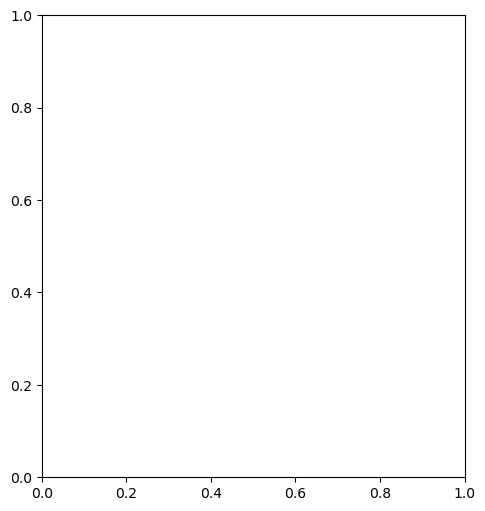

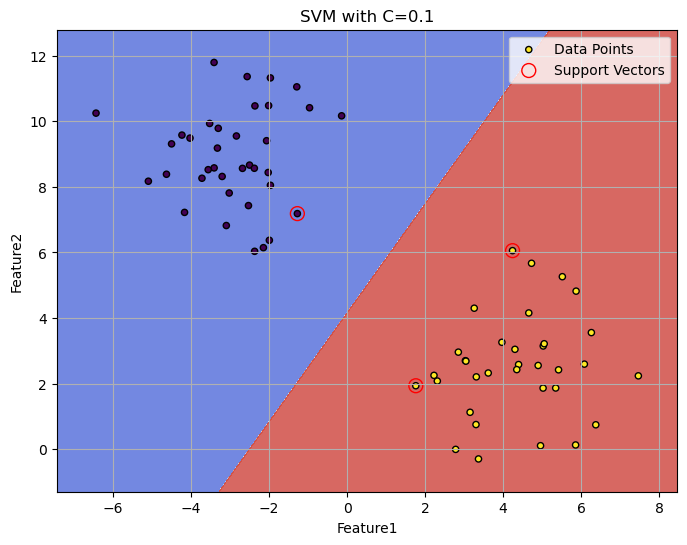

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


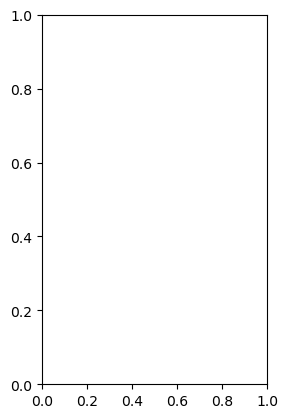

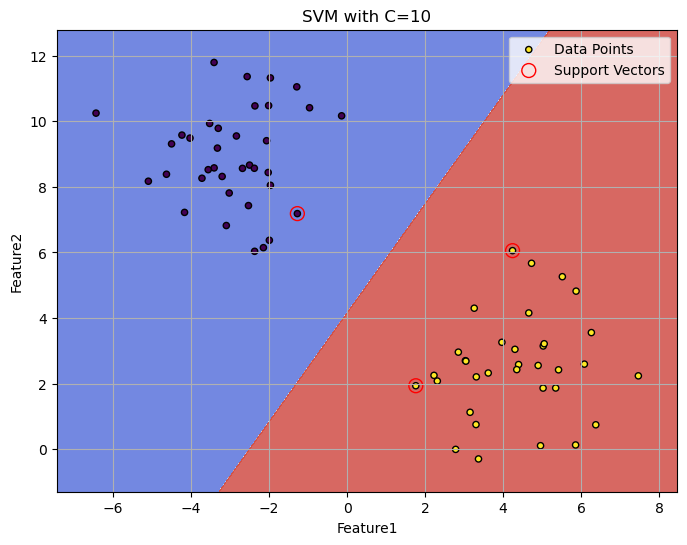

In [23]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# Convert to pandas DataFrame for convenience
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Feature1', 'Feature2']], df['Target'], test_size=0.3, random_state=42)

# Step 3: Train SVM models with two different C values
svm_model_c1 = SVC(kernel='linear', C=0.1)  # Smaller C (more margin violations allowed)
svm_model_c2 = SVC(kernel='linear', C=10)   # Larger C (tries to minimize margin violations)

svm_model_c1.fit(X_train, y_train)
svm_model_c2.fit(X_train, y_train)

# Step 4: Evaluate the models
print("SVM Model with C=0.1")
print("Training Accuracy: ", svm_model_c1.score(X_train, y_train))
print("Testing Accuracy: ", svm_model_c1.score(X_test, y_test))

print("\nSVM Model with C=10")
print("Training Accuracy: ", svm_model_c2.score(X_train, y_train))
print("Testing Accuracy: ", svm_model_c2.score(X_test, y_test))

# Step 5: Plot the decision boundaries and support vectors for both models
def plot_decision_boundary_with_support_vectors(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, label="Data Points")
    
    # Highlight the support vectors with a larger marker and different color
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                facecolors='none', edgecolors='r', s=100, label="Support Vectors", marker='o')
    
    plt.title(title)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 6: Plot decision boundaries for both models
X_train_values = X_train.values
X_test_values = X_test.values

plt.figure(figsize=(12, 6))

# Plot for C=0.1
plt.subplot(1, 2, 1)
plot_decision_boundary_with_support_vectors(X_train_values, y_train, svm_model_c1, "SVM with C=0.1")

# Plot for C=10
plt.subplot(1, 2, 2)
plot_decision_boundary_with_support_vectors(X_train_values, y_train, svm_model_c2, "SVM with C=10")
